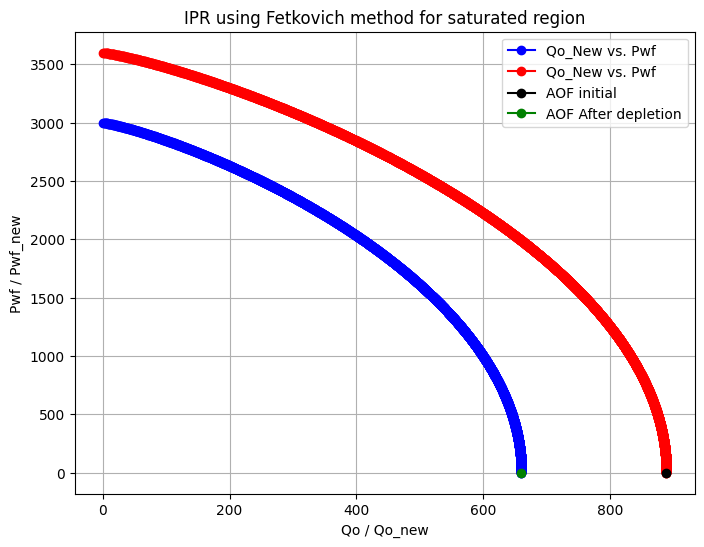

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
pr = 3600  # Initial reservoir pressure
prf = 3000  # reservoir pressure after depletion  " f => final"
# Test data ( Get from DST or Build up test)
Pwf = np.array([3170, 2890, 2440, 2150])
Qo = np.array([263, 383, 497, 640])

# Calculate (pr**2 - Pwf**2)
result = pr**2 - Pwf**2


# Perform linear regression in log-log space
log_Qo = np.log(Qo)
log_result = np.log(result)
slope, intercept, r_value, p_value, std_err = linregress(log_Qo, log_result)

# to get the n and C
n=1/slope
C=Qo[0]/((pr**2-Pwf[0]**2)**n)
# Calculate the best-fit line in log-log space
#log_y_fit = slope * log_Qo + intercept
#y_fit = np.exp(log_y_fit)



# Create an array of Pwf values from pr down to 0 for initial reservoir pressure pr =3600
Pwf_values = np.arange(pr, -1, -1)  # Start from pr and go down to 0

# Calculate Qo for each Pwf using the equation for initial reservoir pressure pr =3600
Qo_values = C * (pr**2 - Pwf_values**2)**n
AOF = C * (pr**2 )**n  # Pwf_values**2 == 0 to get AOf


# Calculate Cf after depletion
Cf=C*( prf / pr ) # Prf = reservoir pressure after depletion

Pwf_values_f = np.arange(prf, -1, -1)  # Start from prf and go down to 0
Qo_values_f = C * (prf**2 - Pwf_values_f**2)**n
AOF_f = C * (prf**2 )**n  # Pwf_values_f **2 == 0 to get AOf after depletion


# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(Qo_values_f,Pwf_values_f , marker='o', linestyle='-', color='b', label='Qo_New vs. Pwf')
plt.plot(Qo_values,Pwf_values , marker='o', linestyle='-', color='r', label='Qo_New vs. Pwf')
plt.plot(AOF,0, color='black', marker='o', label='AOF initial')
plt.plot(AOF_f,0, color='g', marker ='o', label='AOF After depletion')

plt.grid(True)
plt.xlabel('Qo / Qo_new')
plt.ylabel('Pwf / Pwf_new')
plt.title('IPR using Fetkovich method for saturated region')

plt.legend()
plt.show()
